In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils
from sklearn import svm, metrics

In [26]:
path_to_files = "test_load/" 
dfCRY5 = pd.read_hdf(path_to_files + "CRY5lo.h5").query('(lyield==17000)')

In [3]:
var_dict = utils.getVarList('allCRY5')
var_dict

{'crvinfo_x': [-8000, 1000],
 'crvinfo_y': [0, 3500],
 'crvinfo_z': [-5000, 20000],
 'de_nhits': [0, 100],
 'ue_nhits': [0, 100],
 'dequal_TrkPID': [-1.1, 1.1],
 'dequal_TrkQual': [-0.1, 1.1],
 'deent_td': [0, 3],
 'deent_d0': [-500, 500],
 'crvinfo_PEs': [-1, 1000],
 'crvinfo_dT': [-200, 100],
 'deent_mom': [50, 200]}

In [4]:
dfCRY5.query('abs(demcpri_pdg)==13')

,evtinfo_eventid,evtinfo_subrunid,evtinfomc_nprotons,de_status,de_pdg,de_nhits,de_t0,deent_d0,deent_maxr,deent_td,...,crvsummarymc_crvSectorType,crvsummarymc_pdgId,dequal_TrkQual,dequal_TrkPID,deent_mom,demcpri_mom,is_high,lyield,debestcrv_dT,debestcrv_dTe
0,259832,0,1,2,-11,57,1265.649170,7.341033,-608.452454,0.332109,...,3,-13,0.786401,-1.000000,98.400986,1907.103149,0,17000,-114.164551,-26.314575
1,263977,0,1,1,-11,40,584.103760,-159.690765,-642.126587,0.891969,...,3,13,0.061298,0.999894,98.037033,1220.846313,0,17000,15.189270,115.589294
2,62701,6,1,1,-11,23,1011.072632,115.154976,-589.048462,0.843411,...,3,13,0.003386,-1.000000,139.704849,1553.367676,0,17000,21.886719,109.736816
3,117858,6,1,2,-11,33,614.504211,-29.631735,-527.721375,0.474046,...,3,-13,0.000584,-1.000000,83.593147,1500.012451,0,17000,-110.450562,-22.600525
4,430037,6,1,2,-11,43,915.917480,41.484543,-575.115723,0.331220,...,3,-13,0.129571,-1.000000,98.503738,1225.212280,0,17000,-114.692017,-26.842041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204812,314852,93540,1,1,-11,31,1472.962158,35.365593,-472.527191,0.695598,...,3,-13,0.984643,-1.000000,93.823776,1670.135742,0,17000,-123.203857,-35.353882
204813,312779,93574,1,1,-11,29,1355.218750,-118.626007,-490.861572,1.121098,...,3,-13,0.975737,-1.000000,84.803764,2392.837891,0,17000,-47.784424,40.065674
204814,389678,93574,1,1,-11,47,1511.505493,-178.715103,-610.779358,1.032714,...,3,-13,0.999926,0.999998,94.191269,12817.048828,0,17000,-20.267822,67.582275
204815,470506,93633,1,1,-11,31,1302.996216,71.978882,-484.013489,0.609513,...,3,13,0.238360,-1.000000,98.744446,1545.615112,0,17000,-22.882690,52.417236


In [5]:
dfCRY5.query('abs(demcpri_pdg)==13 & de_t0 > 600 & debestcrv_timeWindowStart==0')

,evtinfo_eventid,evtinfo_subrunid,evtinfomc_nprotons,de_status,de_pdg,de_nhits,de_t0,deent_d0,deent_maxr,deent_td,...,crvsummarymc_crvSectorType,crvsummarymc_pdgId,dequal_TrkQual,dequal_TrkPID,deent_mom,demcpri_mom,is_high,lyield,debestcrv_dT,debestcrv_dTe
38,227186,17257,1,1,-11,29,1231.534912,-144.774490,-494.856567,1.376695,...,-1,-99999,0.998201,-1.000000,90.335991,8504.970703,0,17000,-1231.534912,-1231.534912
45,93976,17884,1,1,-11,33,1375.597168,-34.306904,-517.035278,1.102262,...,-1,-99999,0.836486,-1.000000,108.951370,3258.206787,0,17000,-1375.597168,-1375.597168
86,401195,20360,1,1,-11,42,946.415466,-129.966675,-520.661377,1.516311,...,-1,-99999,0.998941,0.999875,107.618423,7068.933105,0,17000,-946.415466,-946.415466
87,495281,20360,1,2,-11,31,985.809814,-48.224419,-533.997375,0.925990,...,-1,-99999,0.981859,-1.000000,100.400917,7068.933105,0,17000,-985.809814,-985.809814
89,174577,20439,1,1,-11,57,1429.897705,-181.730774,-624.551392,1.180955,...,4,-13,0.999818,0.999645,103.918823,5459.991699,0,17000,-1429.897705,-1429.897705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204426,369479,63194,1,1,-11,60,742.896973,-173.736511,-604.722778,1.111427,...,2,-13,0.997324,-1.000000,97.717697,7582.655273,0,17000,-742.896973,-742.896973
204480,474583,67833,1,1,-11,39,1124.891235,-147.802689,-538.433899,1.025878,...,-1,-99999,0.997341,-1.000000,84.868317,7803.124512,0,17000,-1124.891235,-1124.891235
204505,72067,80708,1,1,-11,36,1073.234985,-97.610382,-501.032379,0.889602,...,3,13,0.901272,-1.000000,81.884117,9719.473633,0,17000,-1073.234985,-1073.234985
204615,223335,51130,1,1,-11,43,635.364624,-91.120743,-553.530273,0.917258,...,-1,-99999,0.993385,-1.000000,95.157135,8067.059082,0,17000,-635.364624,-635.364624


In [104]:
1.2215088282504012e-05
1838  /99.4E6

1.8490945674044265e-05

In [105]:
1.2215088282504012e-05/6.338028169014085e-06

1.9272694845728553

In [108]:
0.0001130872124130551/1.8490945674044265e-05

6.115815513524308

In [6]:
ndf = dfCRY5.query('abs(demcpri_pdg)==13 & de_t0 > 600 & debestcrv_timeWindowStart==0')
for label in ndf.columns:
    if label not in var_dict or "crvinfo" in label:
        ndf = ndf.drop(columns=label)
muon_df = ndf

In [7]:
ndf = dfCRY5.query('demcpri_pdg==2112 & de_t0 > 600 & debestcrv_timeWindowStart==0')
for label in ndf.columns:
    if label not in var_dict or "crvinfo" in label:
        ndf = ndf.drop(columns=label)
neutron_df = ndf

In [7]:
muon_df.columns

Index(['de_nhits', 'deent_d0', 'deent_td', 'ue_nhits', 'dequal_TrkPID',
       'dequal_TrkQual', 'deent_mom'],
      dtype='object')

In [9]:
neutron_data = neutron_df.to_numpy()
#muon_data = np.take(muon_df.to_numpy(), np.random.choice(len(muon_df), len(neutron_df)), axis=0)
muon_data = muon_df.to_numpy()


In [10]:
Y_data = np.append(np.zeros(len(muon_data),dtype=int),np.ones(len(neutron_data), dtype=int))  # 0 - muon, 1 - neutron
X_data = np.append(muon_data, neutron_data, axis = 0)
AData = np.append(X_data,Y_data.reshape(len(muon_data) + len(neutron_data), 1), axis = 1)
np.random.shuffle(AData)
X_data, Y_data = AData[:,:-1], AData[:,-1]
Y_data = np.array([int(x) for x in Y_data])

In [11]:
n_v = int(len(X_data) * 0.2)
n_tr = len(X_data) - n_v

In [12]:
def get_my_data(num_training=n_tr, num_validation=n_v, num_test=0):

    X_train, y_train = X_data, Y_data
        
    # Сэмплируем из полного набора данных
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]

    return X_train, y_train, X_val, y_val


# Вызываем функцию чтобы получить данные.
X_train, y_train, X_val, y_val = get_my_data()
print('Train data shape: ', X_train.shape)
print('Train label shape: ', y_train.shape)
print('Val data shape: ', X_val.shape)
print('Val label shape:  ', y_val.shape)

Train data shape:  (2413, 7)
Train label shape:  (2413,)
Val data shape:  (603, 7)
Val label shape:   (603,)


In [13]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [14]:
proba = clf.predict_proba(X_val)
y_score = [ x[1] for x in proba]
fpr, tpr, thresholds = metrics.roc_curve(y_val.flatten(), y_score)

In [15]:
sign_ar = np.append(X_val, proba[:,1].reshape(len(proba),1), axis=1)
sign_ar = np.append(sign_ar, y_val.reshape(len(proba),1), axis=1)
sign_ar = np.append(sign_ar, np.zeros(len(proba),dtype=int).reshape(len(proba),1), axis=1)

In [16]:
sign_df = pd.DataFrame(sign_ar, columns = [*muon_df.columns,'neutronicity','is_neutron','is_high'])

In [69]:
# fpr1, tpr1, thresholds1 = fpr, tpr, thresholds

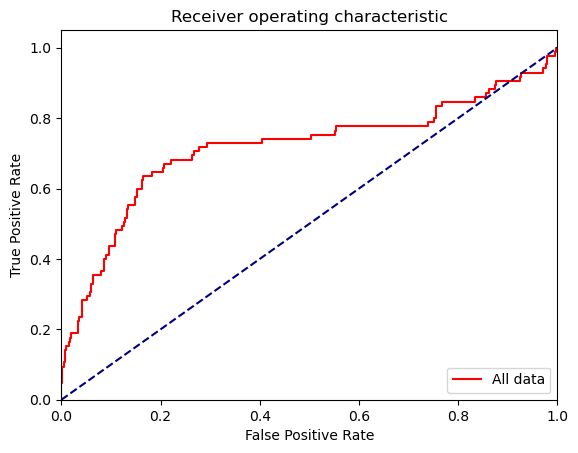

In [17]:
plt.figure()
# plt.plot(fpr1, tpr1, color="darkorange", label="Nmu = Nn")
plt.plot(fpr, tpr, color="red", label="All data")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#neutronicity

In [18]:
import cuts
import math

In [27]:
neve_extmom = len(dfCRY5.query(cuts.cut_extmom))
neve_physmom = len(dfCRY5.query(cuts.cut_phymom))
mom_scale = neve_extmom/neve_physmom
print('Momentum scale: %2.1f'% mom_scale)
ave, err, _, _, _, _ = utils.getNormBackground(dfCRY5, 'abs(demcpri_pdg)==13', mom_scale, lotime=cuts.CRY5_LT_LO, hitime=cuts.CRY5_LT_HI)
print('Muon background: %2.3f +/- %2.3f'%(ave*1.2, err*np.sqrt(1.2)))

ave, err, _, _, _, _ = utils.getNormBackground(dfCRY5, 'demcpri_pdg==2112', mom_scale, lotime=cuts.CRY5_LT_LO, hitime=cuts.CRY5_LT_HI)
print('Neutron background: %2.3f +/- %2.3f'%(ave*1.2, err*np.sqrt(1.2)))

Momentum scale: 46.0
Muon background: 255.506 +/- 0.440
Neutron background: 0.719 +/- 0.023


In [20]:
for pa in np.arange(0.2, 1.6, 0.1):
    try:
        nback = utils.getNormBackground(dfCRY5,'demcpri_pdg==2112 & de_t0 > 600 & debestcrv_timeWindowStart==0 & deent_td < %f' % (pa), 1, lotime=cuts.CRY5_LT_LO, hitime=cuts.CRY5_LT_HI)[0]
        mback = utils.getNormBackground(dfCRY5,'abs(demcpri_pdg)==13 & de_t0 > 600 & debestcrv_timeWindowStart==0 & deent_td < %f' % (pa),1, lotime=cuts.CRY5_LT_LO, hitime=cuts.CRY5_LT_HI)[0]
        print('%f \t %f' % (pa, nback / math.sqrt(mback)))
    except:
        print('\t division by zero : %f' % pa)

	 division by zero : 0.200000
	 division by zero : 0.300000
0.400000 	 1.835619
0.500000 	 3.059769
0.600000 	 3.408084
0.700000 	 3.645216
0.800000 	 3.614504
0.900000 	 3.346760
1.000000 	 2.701402
1.100000 	 2.332590
1.200000 	 2.106348
1.300000 	 1.980825
1.400000 	 1.920200
1.500000 	 1.888297


In [21]:
for prob in np.arange(0.1, 1.1, 0.05):
    try:
        nback = utils.getNormBackground(sign_df,'is_neutron==1 &  neutronicity > %f' % (prob), 1, lotime=cuts.CRY5_LT_LO*0.2, hitime=cuts.CRY5_LT_HI)[0]
        mback = utils.getNormBackground(sign_df,'is_neutron==0 &  neutronicity > %f' % (prob),1, lotime=cuts.CRY5_LT_LO*0.2, hitime=cuts.CRY5_LT_HI)[0]
        print('%f \t %f' % (prob, nback / math.sqrt(mback)))
    except:
        print('\t division by zero : %f' % prob)

0.100000 	 1.470826
0.150000 	 1.616869
0.200000 	 2.057549
0.250000 	 2.087744
0.300000 	 1.868303
0.350000 	 1.821285
0.400000 	 1.668745
0.450000 	 2.110813
0.500000 	 1.978888
0.550000 	 2.064966
0.600000 	 2.214102
0.650000 	 2.503117
0.700000 	 2.503117
0.750000 	 2.294524
0.800000 	 2.085931
0.850000 	 1.926900
0.900000 	 3.337489
0.950000 	 1.668745
	 division by zero : 1.000000
	 division by zero : 1.050000


In [18]:
sign_df

,de_nhits,deent_d0,deent_td,ue_nhits,dequal_TrkPID,dequal_TrkQual,deent_mom,neutronicity,is_neutron,is_high
0,59.0,91.786224,1.049798,-1.0,-1.000000,0.864123,117.600731,0.255863,0.0,0.0
1,54.0,134.717926,0.591877,49.0,-1.000000,0.310484,74.423477,0.236408,0.0,0.0
2,34.0,177.176315,1.753880,-1.0,-1.000000,0.992168,102.875168,0.196069,0.0,0.0
3,48.0,14.179731,1.002204,-1.0,0.999712,0.999463,140.088684,0.136263,0.0,0.0
4,49.0,45.256378,0.923598,-1.0,0.999899,0.999371,108.203537,0.428255,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
488,23.0,3.058052,1.298054,-1.0,-1.000000,0.821657,111.069550,0.136095,0.0,0.0
489,15.0,7.807498,0.770128,52.0,-1.000000,0.001460,112.719803,0.019123,1.0,0.0
490,51.0,158.909531,0.979289,-1.0,0.999630,0.999597,89.622620,0.224457,0.0,0.0
491,31.0,121.650070,1.384833,-1.0,-1.000000,0.735384,92.822929,0.197350,0.0,0.0


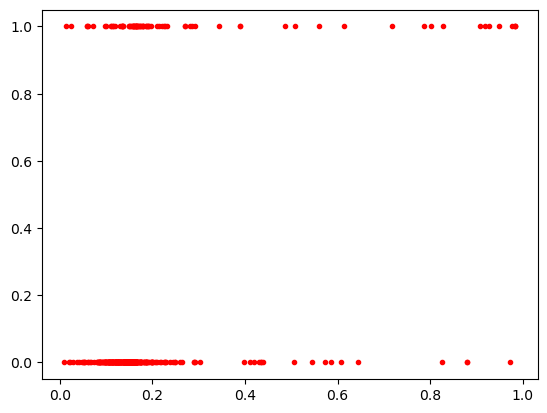

In [25]:
plt.plot(sign_df['neutronicity'], sign_df['is_neutron'],'.', color="red", label="All data")

In [23]:
'''PA    NEG                      POS
0.400000 	 0.705173    0.400000 	 1.835619
0.500000 	 2.227520    0.500000 	 3.059769
0.600000 	 4.004642    0.600000 	 3.408084
0.700000 	 4.038667    0.700000 	 3.645216
0.800000 	 4.046265    0.800000 	 3.614504
0.900000 	 4.044426    0.900000 	 3.346760
1.000000 	 4.008892    1.000000 	 2.701402
1.100000 	 3.622775    1.100000 	 2.332590
1.200000 	 3.359773    1.200000 	 2.106348
1.300000 	 3.120249    1.300000 	 1.980825
1.400000 	 2.999718    1.400000 	 1.920200
1.500000 	 2.904303    1.500000 	 1.888297
'''
'''
svm      NEG                      POS
0.100000 	 2.305502    0.100000 	 1.470826    
0.150000 	 2.265720    0.150000 	 1.616869
0.200000 	 2.730740    0.200000 	 2.057549
0.250000 	 2.672089    0.250000 	 2.087744
0.300000 	 2.777591    0.300000 	 1.868303
0.350000 	 2.644962    0.350000 	 1.821285
0.400000 	 3.131213    0.400000 	 1.668745
0.450000 	 3.113053    0.450000 	 2.110813
0.500000 	 3.237840    0.500000 	 1.978888
0.550000 	 3.456428    0.550000 	 2.064966
0.600000 	 3.982434    0.600000 	 2.214102
0.650000 	 4.291140    0.650000 	 2.503117
0.700000 	 4.797640    0.700000 	 2.503117
0.750000 	 4.576388    0.750000 	 2.294524
'''

'\nsvm      NEG                      POS\n0.100000 \t 2.305502    0.100000 \t 1.470826    \n0.150000 \t 2.265720    0.150000 \t 1.616869\n0.200000 \t 2.730740    0.200000 \t 2.057549\n0.250000 \t 2.672089    0.250000 \t 2.087744\n0.300000 \t 2.777591    0.300000 \t 1.868303\n0.350000 \t 2.644962    0.350000 \t 1.821285\n0.400000 \t 3.131213    0.400000 \t 1.668745\n0.450000 \t 3.113053    0.450000 \t 2.110813\n0.500000 \t 3.237840    0.500000 \t 1.978888\n0.550000 \t 3.456428    0.550000 \t 2.064966\n0.600000 \t 3.982434    0.600000 \t 2.214102\n0.650000 \t 4.291140    0.650000 \t 2.503117\n0.700000 \t 4.797640    0.700000 \t 2.503117\n0.750000 \t 4.576388    0.750000 \t 2.294524\n'

In [24]:
'''
PA POS
0.400000 	 1.835619
0.500000 	 3.059769
0.600000 	 3.408084
0.700000 	 3.645216
0.800000 	 3.614504
0.900000 	 3.346760
1.000000 	 2.701402
1.100000 	 2.332590
1.200000 	 2.106348
1.300000 	 1.980825
1.400000 	 1.920200
1.500000 	 1.888297
'''
'''
svm POS
0.100000 	 1.470826
0.150000 	 1.616869
0.200000 	 2.057549
0.250000 	 2.087744
0.300000 	 1.868303
0.350000 	 1.821285
0.400000 	 1.668745
0.450000 	 2.110813
0.500000 	 1.978888
0.550000 	 2.064966
0.600000 	 2.214102
0.650000 	 2.503117
0.700000 	 2.503117
0.750000 	 2.294524
0.800000 	 2.085931
0.850000 	 1.926900
0.900000 	 3.337489
0.950000 	 1.668745
'''

'\nsvm POS\n0.100000 \t 1.470826\n0.150000 \t 1.616869\n0.200000 \t 2.057549\n0.250000 \t 2.087744\n0.300000 \t 1.868303\n0.350000 \t 1.821285\n0.400000 \t 1.668745\n0.450000 \t 2.110813\n0.500000 \t 1.978888\n0.550000 \t 2.064966\n0.600000 \t 2.214102\n0.650000 \t 2.503117\n0.700000 \t 2.503117\n0.750000 \t 2.294524\n0.800000 \t 2.085931\n0.850000 \t 1.926900\n0.900000 \t 3.337489\n0.950000 \t 1.668745\n'